In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
bmi=pd.read_csv('data/bmi.csv')

In [7]:
bmi.corr()

,height,weight,label
height,1.000000,0.005004,-0.716915
weight,0.005004,1.000000,0.546957
label,-0.716915,0.546957,1.000000


### 상관도를 보면 Weight와 label이 관련이 높은걸 알 수 있다.

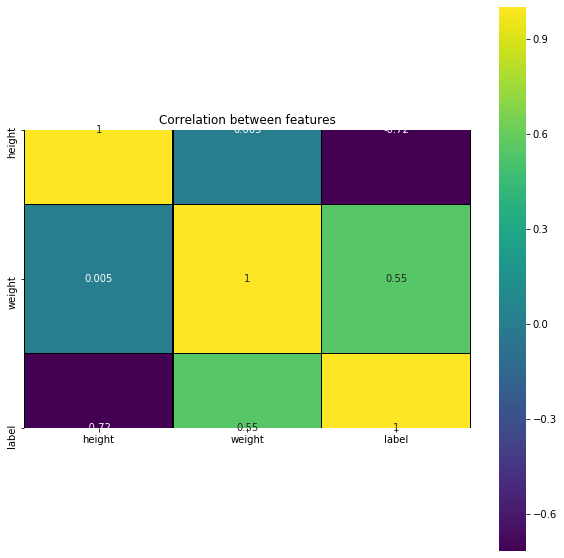

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(bmi.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="black")
plt.title('Correlation between features')
plt.show()

In [9]:
bmi.head()

,height,weight,label
0,185,45,1
1,167,37,1
2,191,79,2
3,122,73,3
4,182,62,2


In [10]:
bmi.groupby('label').size()

label
1    6406
2    5896
3    7698
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


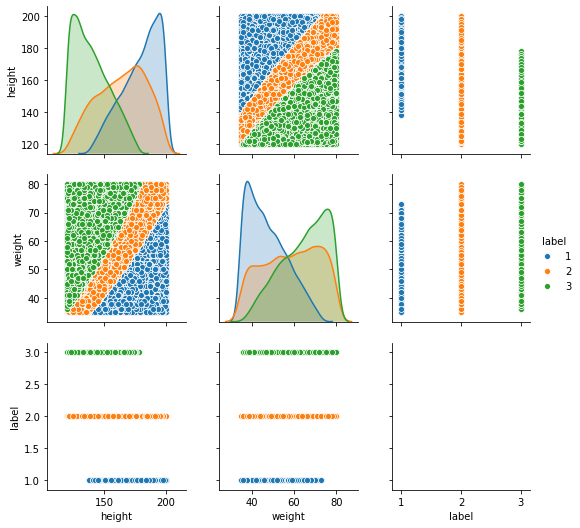

In [11]:
sns.pairplot(bmi, hue='label')

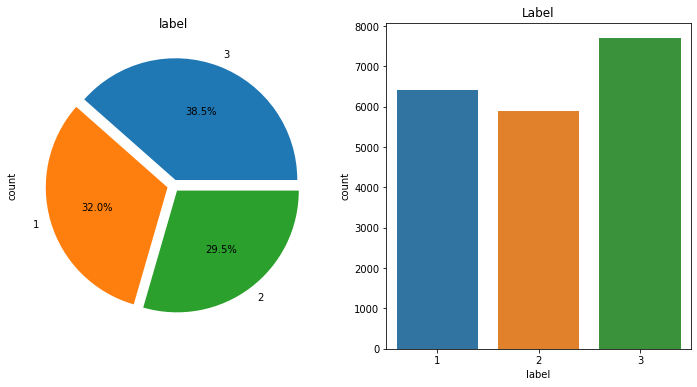

In [14]:
f,ax=plt.subplots(1,2,figsize=(12,6))

bmi['label'].value_counts().plot.pie(ax=ax[0],explode=(0.05, 0.05, 0.05),autopct='%1.1f%%')
ax[0].set_title('label')
ax[0].set_ylabel('count')

sns.countplot('label', data=bmi,ax=ax[1])
ax[1].set_title('Label')
plt.show()

In [35]:
y = bmi.loc[:,'label'] 
x = bmi.loc[:,['height','weight']]

In [36]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, train_size=0.8, shuffle=True)

In [37]:
clf=SVC()

In [38]:
clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
print("정답률 >>", accuracy_score(y_test,clf.predict(x_test)))

정답률 >> 0.999


In [40]:
임의데이터=[185,78]

In [41]:
clf.predict([임의데이터])

array([2], dtype=int64)

## 임의 데이터 [185,78] 을 넣었을 때 label이 2가 나옴